In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
data = pd.read_csv("hour.csv")
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Renaming  the Features

In [4]:
data.rename(columns={"instant":"record_id","dteday":"date","yr":"year","mnth":"month","weathersit":"weather_condition",
                     "hum":"humidity","cnt":"total_counts"},inplace=True)

In [5]:
data.head()

,record_id,date,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Bsic checks

In [6]:
data.shape

(17379, 17)

In [7]:
data.size

295443

* And size is telling us that 295443 entries of records are there in this dataset

## CHECKING THE DATA TYPE OF ALL FEATURES

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hr                 17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_counts       173

Well all the attributes are of numeric type except one i.e. date which is of categorical type

## Some Statistical Analysis

In [9]:
data.describe()

,record_id,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counts
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


* No constant column is there in this dataset
* Max. windspeed is 0.85
* Max. casual users are 367 in number.
* Max. Registered users are 886 in number. which means the registered users are more than the casual ones.
* 50% of the records are present who take bikes on rent are in 7th month of 2012 in summers season at 12pm where humidity is 0.63 and windspeed is 0.194 and maximum are the registered users.

## Checking missing values

In [10]:
data.isnull().sum()

record_id            0
date                 0
season               0
year                 0
month                0
hr                   0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_counts         0
dtype: int64

## EDA
### Univariate Analysis

In [11]:
import sweetviz as sv
univariate_report = sv.analyze(data)
univariate_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* From univariate analysis we observed that this data is having :

* 17379 ROWS
* 0 DUPLICATES
* 3.4 MB RAM
* 17 FEATURES
* 6 CATEGORICAL FEATURES
* 10 NUMERICAL FEATURES
* 1 TEXT TYPE OF FEATURE i.e. "date" is in text format
* And Many more is that we get to know every bit of every feature like the distribution of that particular record and some statistical ideas about that.

### Bivariate Analysis

#### COMPARING SEASON AND COUNT

In [12]:
data.loc[data["season"]==1,"season"]="winter"
data.loc[data["season"]==2,"season"]="spring"
data.loc[data["season"]==3,"season"]="summer"
data.loc[data["season"]==4,"season"]="rain"

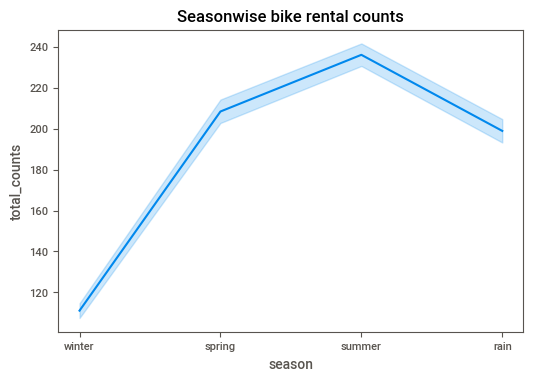

In [13]:
sns.lineplot(x=data.season,y=data.total_counts)
plt.title("Seasonwise bike rental counts")
plt.show()

### IMPACT OF YEAR ON TARGET FEATURE

In [14]:
data.loc[data["year"]==0,"year"]=2011
data.loc[data["year"]==1,"year"]=2012

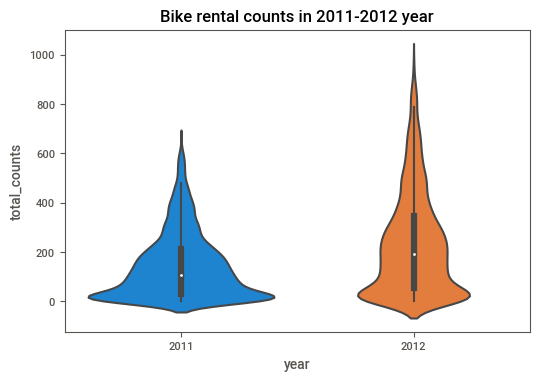

In [15]:
sns.violinplot(x=data.year,y=data.total_counts)
plt.title("Bike rental counts in 2011-2012 year")
plt.show()


### Monthly Impact

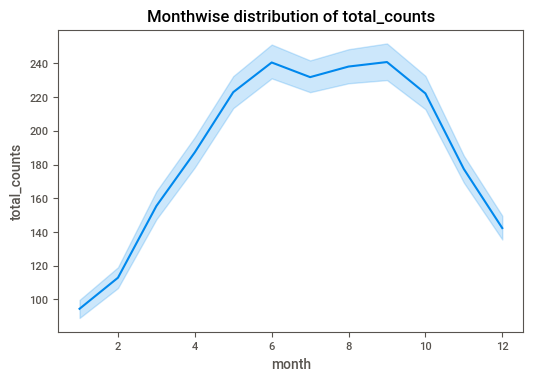

In [16]:
sns.lineplot(x=data.month,y=data.total_counts)
plt.title("Monthwise distribution of total_counts")
plt.show()

### Hourly Impact

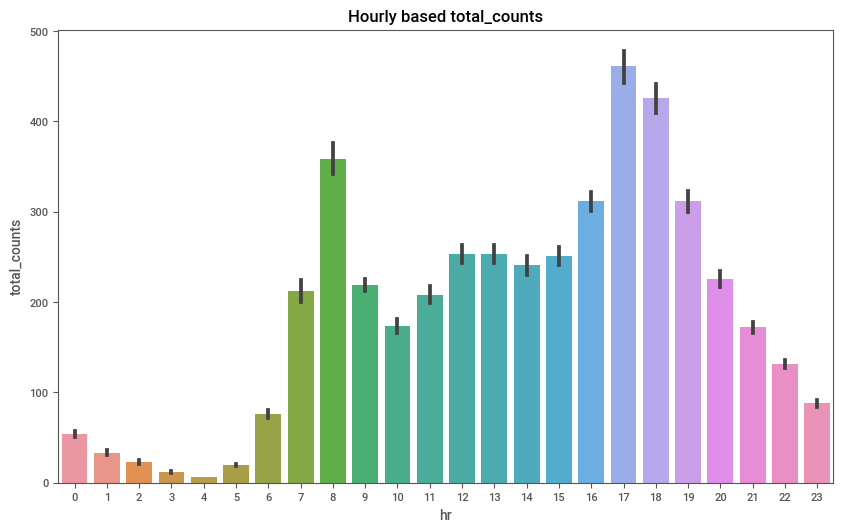

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.hr,y=data.total_counts)
plt.title("Hourly based total_counts")
plt.show()

### Impact of weekdays

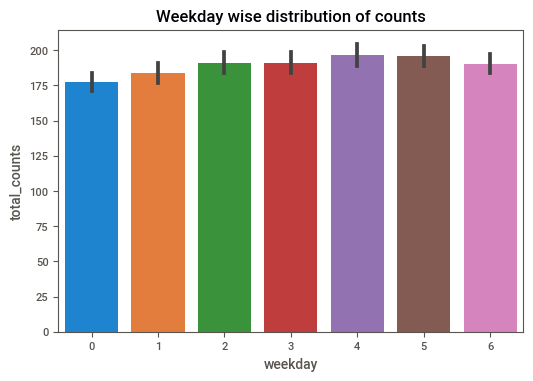

In [18]:
sns.barplot(x=data.weekday,y=data.total_counts)
plt.title("Weekday wise distribution of counts")
plt.show()

### IMPACT OF WEATHER ON THE WORK

In [19]:
data.loc[data["weather_condition"]==1,"weather_condition"]="Clear or Partially cloudy"
data.loc[data["weather_condition"]==2,"weather_condition"]="Cloud and Mist"
data.loc[data["weather_condition"]==3,"weather_condition"]="Light rain or Thunderstrom"
data.loc[data["weather_condition"]==4,"weather_condition"]="Heavy rain or Thunderstrom"

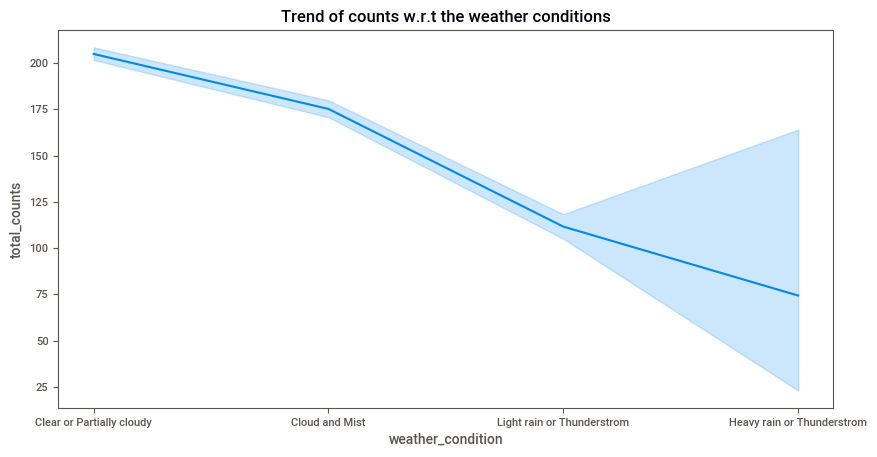

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data.weather_condition,y=data.total_counts)
plt.title("Trend of counts w.r.t the weather conditions")
plt.show()

### IMPACT OF SOME ATMOSPHERIC CONDITIONS ON TARGET FEATURE

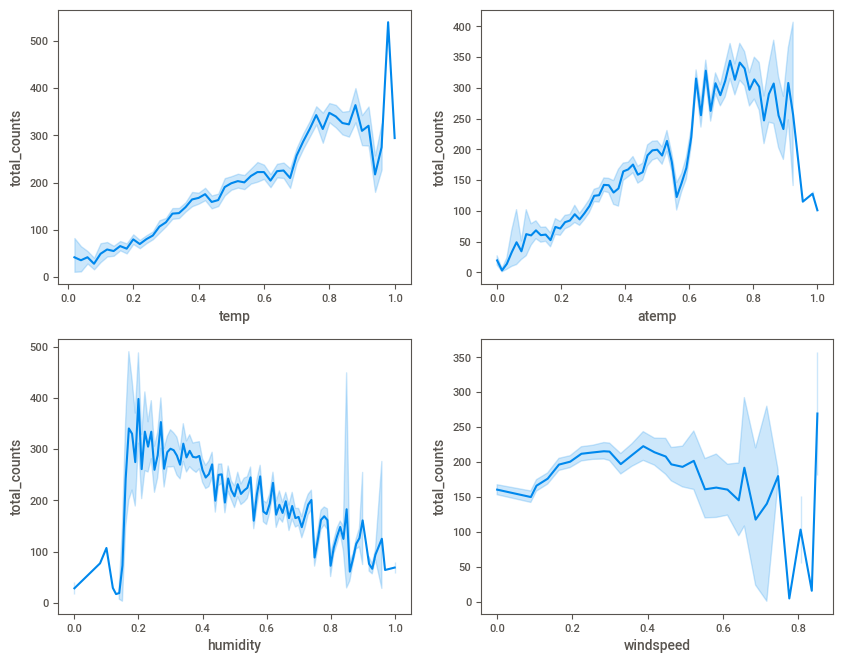

In [21]:
data1=data[["temp","atemp","humidity","windspeed"]]
plt.figure(figsize=(10,8), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=6:
        plt.subplot(2,2,plotnumber)
        sns.lineplot(x=data1[i],y=data["total_counts"])
        plt.xlabel(i)
    plotnumber+=1  

plt.show()

### Multivariate Analysis

### Comparing total_counts w.r.t. months based on weekdays

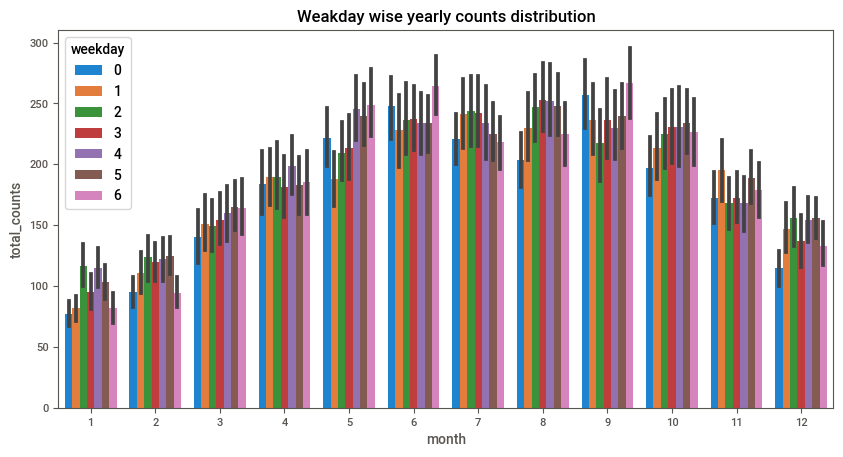

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x="month",y="total_counts",data=data,hue="weekday")
plt.title("Weakday wise yearly counts distribution")
plt.show()

### Comparing 2011 and 2012's bike rental user counts impacted by different seasons:

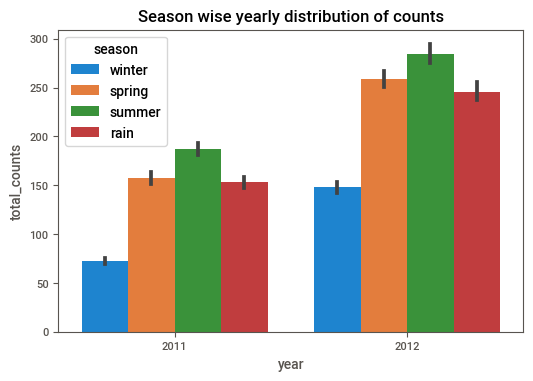

In [23]:
sns.barplot(x="year",y="total_counts",data=data,hue="season")
plt.title("Season wise yearly distribution of counts")
plt.show()

### How the total number of counts vary in all the months in different type of seasons

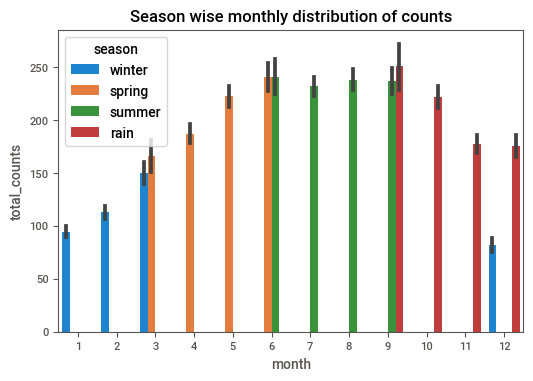

In [24]:
sns.barplot(x="month",y="total_counts",data=data,hue="season")
plt.title("Season wise monthly distribution of counts")
plt.show()


### How total number of counts impacted by the hours based on different season

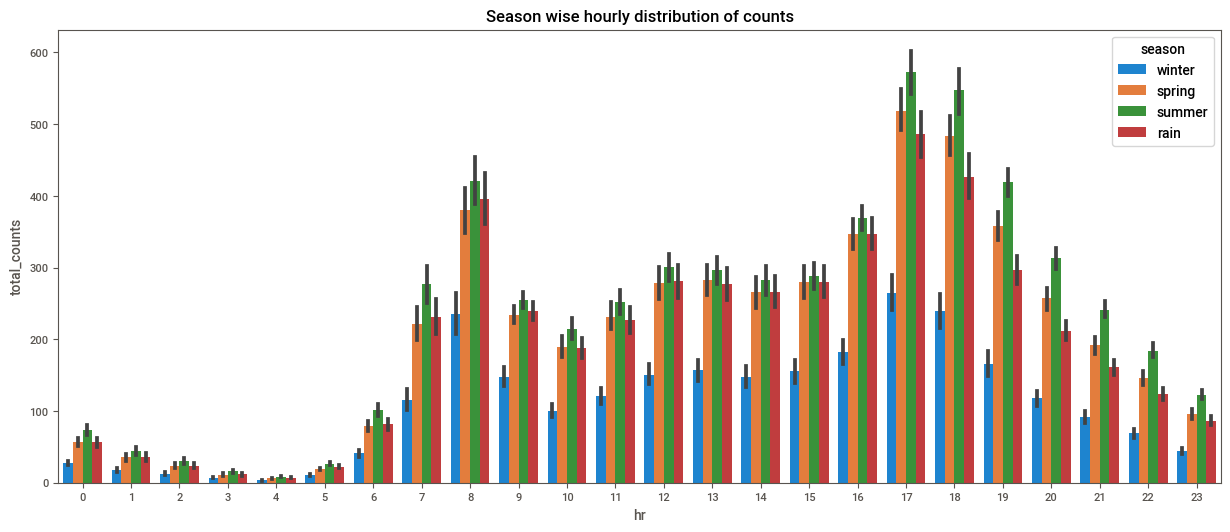

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x= "hr",y="total_counts",data=data,hue="season")
plt.title("Season wise hourly distribution of counts")
plt.show()

#### Let us see the variation of total_counts and months in 2011 and 2012.
#### To know why the number of users are more in 2012 then in 2011 like how the gowth actually happens.

In [26]:
data_of_2011 = data.loc[data["year"]==2011]

In [27]:
data_of_2012 = data.loc[data["year"]==2012]

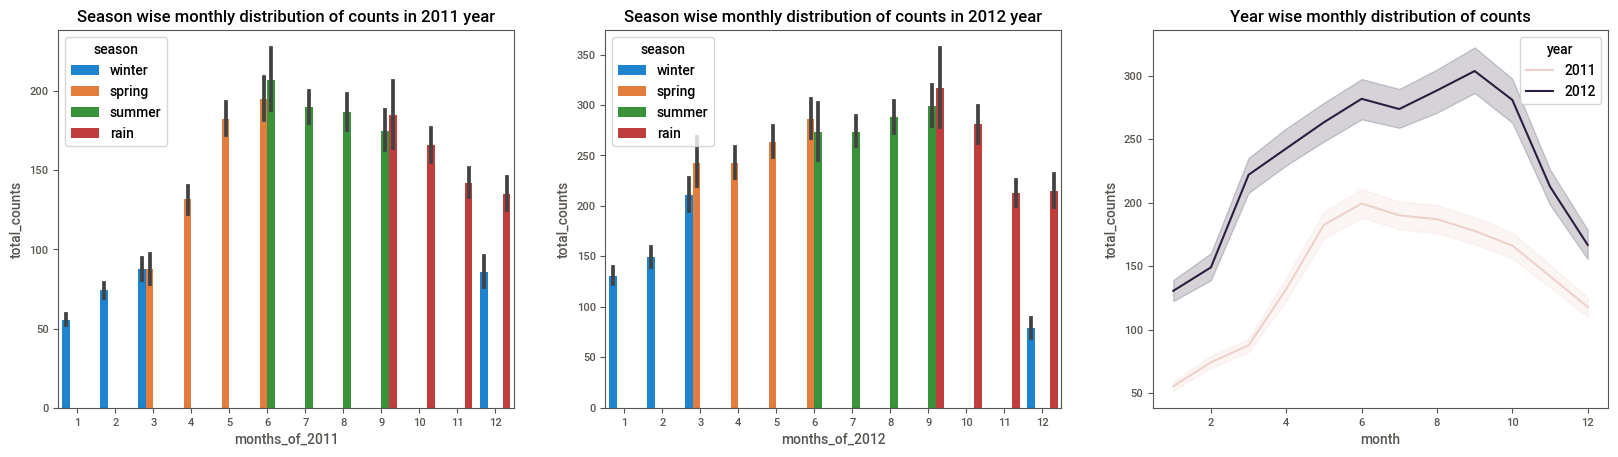

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x = "month",y="total_counts",data=data_of_2011,hue="season")
plt.title("Season wise monthly distribution of counts in 2011 year")
plt.xlabel("months_of_2011")
plt.subplot(1,3,2)
sns.barplot(x="month",y="total_counts",data=data_of_2012,hue="season")
plt.xlabel("months_of_2012")
plt.title("Season wise monthly distribution of counts in 2012 year")
plt.subplot(1,3,3)
sns.lineplot(x="month",y="total_counts",data=data,hue="year")
plt.title("Year wise monthly distribution of counts")
plt.show()

### How the total counts per year impacted by weather conditions

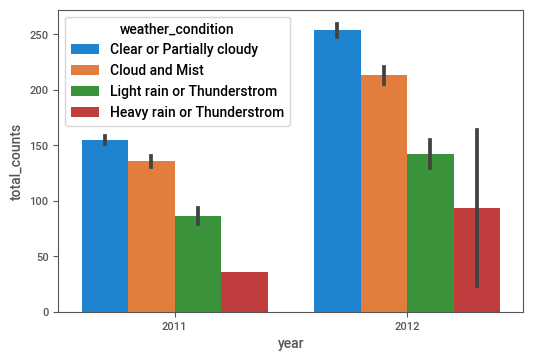

In [29]:
sns.barplot(x= "year",y="total_counts",data=data,hue="weather_condition")
plt.show()

### How the count rate impacted if it was holiday for the people or not

In [30]:
data.loc[data["holiday"]==1,"holiday"]="Holiday"
data.loc[data["holiday"]==0,"holiday"]="No_Holiday"

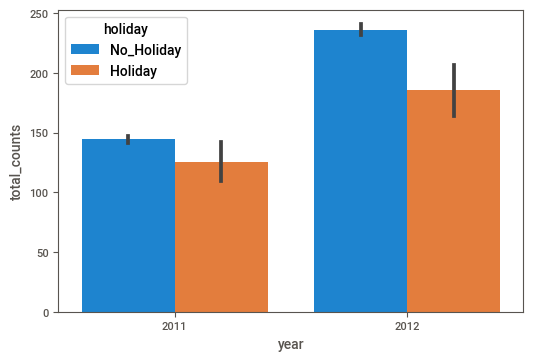

In [31]:
sns.barplot(x= "year",y="total_counts",data=data,hue="holiday")
plt.show()

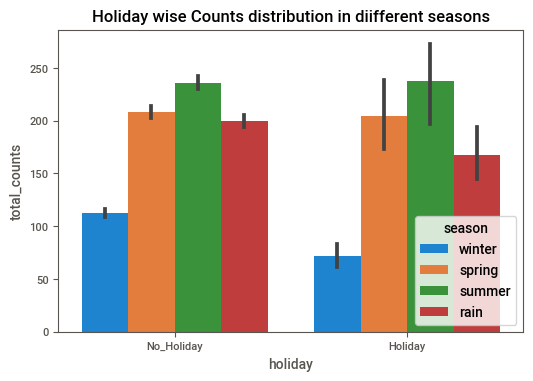

In [32]:
sns.barplot(x= "holiday",y="total_counts",data=data,hue="season")
plt.title("Holiday wise Counts distribution in diifferent seasons")
plt.show()


### How the count rate impacted if it was working day for people or not

In [33]:
data.loc[data["workingday"]==1,"workingday"]="Yes"
data.loc[data["workingday"]==0,"workingday"]="No"

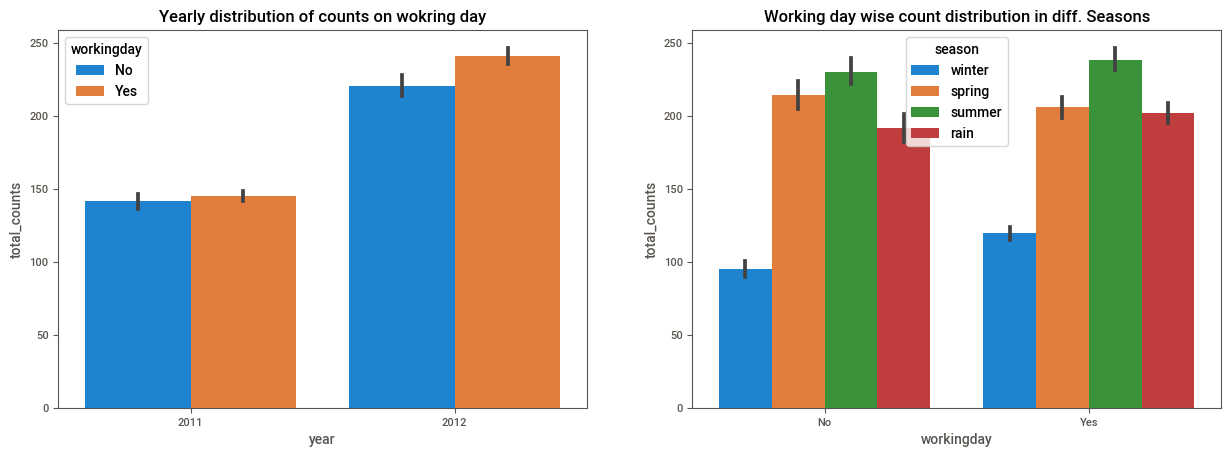

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x= "year",y="total_counts",data=data,hue="workingday")
plt.title("Yearly distribution of counts on wokring day")
plt.subplot(1,2,2)
sns.barplot(x= "workingday",y="total_counts",data=data,hue="season")
plt.title("Working day wise count distribution in diff. Seasons")
plt.show()


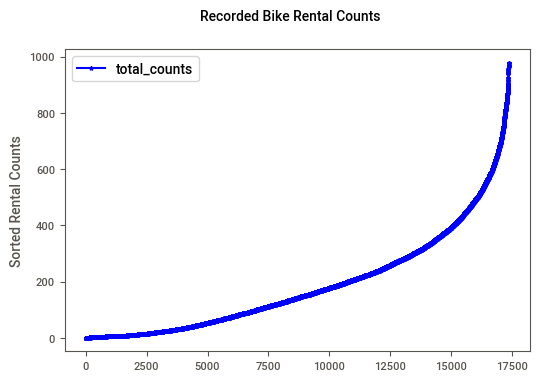

In [35]:
fig,ax= plt.subplots(1)
ax.plot(sorted(data['total_counts']), color = 'blue', marker = '*', label='total_counts')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)
plt.show()

* Loading the original data again in a different variable_name as we did mapping and all for better EDA so our data got little changed.
* Changing the label names back into numbers and make them objective type also.

### Renaming the names of the features

In [38]:
preprocessed_data = pd.read_csv("hour.csv")

In [39]:
preprocessed_data.rename(columns={"instant":"record_id","dteday":"date","yr":"year","mnth":"month",
                                  "weathersit":"weather_condition","hum":"humidity","cnt":"total_counts"},inplace=True)

In [40]:
preprocessed_data.head()

,record_id,date,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
# Checking if any duplicacy is there or not
preprocessed_data.duplicated().sum()

0

###  Type casting the date and discrete features to categorical

In [42]:
preprocessed_data["date"]=pd.to_datetime(preprocessed_data.date)

In [43]:
preprocessed_data["season"] = preprocessed_data["season"].astype("object")

In [44]:
preprocessed_data["year"] = preprocessed_data["year"].astype("object")
preprocessed_data["month"] = preprocessed_data["month"].astype("object")
preprocessed_data["holiday"] = preprocessed_data["holiday"].astype("object")
preprocessed_data["weekday"] = preprocessed_data["weekday"].astype("object")
preprocessed_data["workingday"] = preprocessed_data["workingday"].astype("object")
preprocessed_data["weather_condition"] = preprocessed_data["weather_condition"].astype("object")

### Checking outliers in target feature

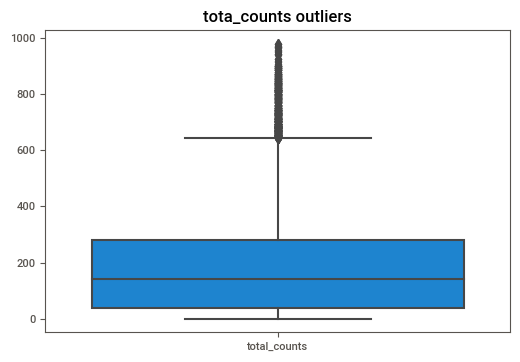

In [45]:
sns.boxplot(data=preprocessed_data[["total_counts"]])
plt.title("tota_counts outliers")
plt.show()

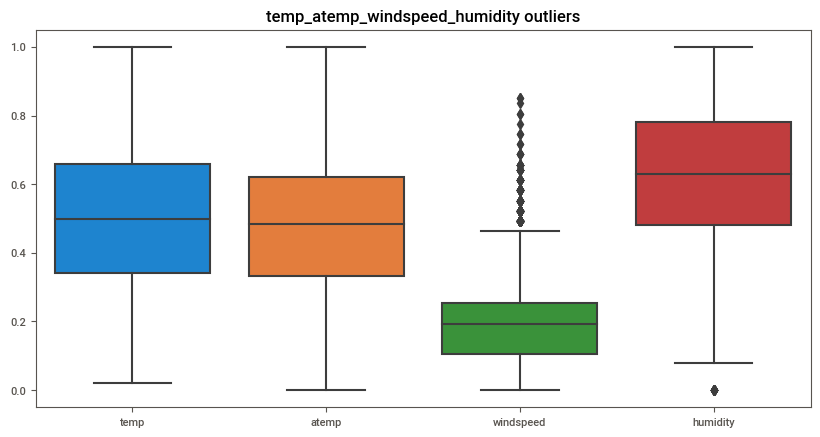

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=preprocessed_data[["temp","atemp","windspeed","humidity"]])
plt.title("temp_atemp_windspeed_humidity outliers")
plt.show()


* From the box plots above, we can easilty observe that no outliers present in temp and atemp
* but few outliers are present in windspeed and humidity feature.

### Using 3 sigma rule to detect the outliers

In [47]:
upper_limit = preprocessed_data[["total_counts"]].mean() + 3*preprocessed_data[["total_counts"]].std()
upper_limit

total_counts    733.625885
dtype: float64

In [48]:
lower_limit = preprocessed_data[["total_counts"]].mean() - 3*preprocessed_data[["total_counts"]].std()
lower_limit

total_counts   -354.69971
dtype: float64

In [49]:
preprocessed_data.loc[preprocessed_data.total_counts < -354.69971 ] 

,record_id,date,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counts


In [50]:
preprocessed_data.loc[preprocessed_data.total_counts > 733.625885]

,record_id,date,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_counts
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


### So 244 records of counts are greater than the upper limit

In [51]:
244/17379*100

1.403993325277634

* As the percentage of outliers is greater than 5% then no treatment for this

### IQR Range

In [52]:
from scipy import stats
IQR = stats.iqr(preprocessed_data.total_counts,interpolation="midpoint")
IQR

241.0

In [53]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = preprocessed_data.total_counts.quantile(0.25)
# Third quartile (Q3) 
Q3 =preprocessed_data.total_counts.quantile(0.75)
##getting the limits
# lower_limit of acceptable range = Q1-1.5(IQR) but we're using 3 as cut-off as we're getting a 
# high percentage of outliers using 1.5 range as cut-off
# upper_limit of acceptable range = Q3 + 1.5(IQR)
min_limit=Q1 - 3*IQR

max_limit=Q3 +3*IQR

In [54]:
min_limit

-683.0

In [55]:
max_limit

1004.0

In [56]:
len((preprocessed_data.loc[preprocessed_data.total_counts < min_limit]))

0

In [57]:
len((preprocessed_data.loc[preprocessed_data.total_counts > max_limit]))

0

### Detecting outliers in windspeed :

In [58]:
upper_limit = preprocessed_data.windspeed.mean() + 3*(preprocessed_data.windspeed.std())
upper_limit

0.5571182920248454

In [59]:
len((preprocessed_data.windspeed.loc[preprocessed_data.windspeed > upper_limit]))

107

In [60]:
107/17379*100

0.615685597560274

In [61]:
lower_limit = preprocessed_data.windspeed.mean() - 3*(preprocessed_data.windspeed.std())
len((preprocessed_data.windspeed.loc[preprocessed_data.windspeed < lower_limit]))

0

### Detecting outliers in humidity

In [62]:
upper_limit = preprocessed_data.humidity.mean() + 3*(preprocessed_data.humidity.std())
lower_limit = preprocessed_data.humidity.mean() - 3*(preprocessed_data.humidity.std())

In [63]:
# Checking the length of the outliers which are above the upper_limit
len((preprocessed_data.humidity.loc[preprocessed_data.humidity < lower_limit]))

22

In [64]:
# Checking length of outliers below the lower_limit
len((preprocessed_data.humidity.loc[preprocessed_data.humidity > upper_limit]))

0

In [65]:
preprocessed_data.loc[preprocessed_data.humidity < lower_limit,"humidity"] = preprocessed_data.humidity.median()

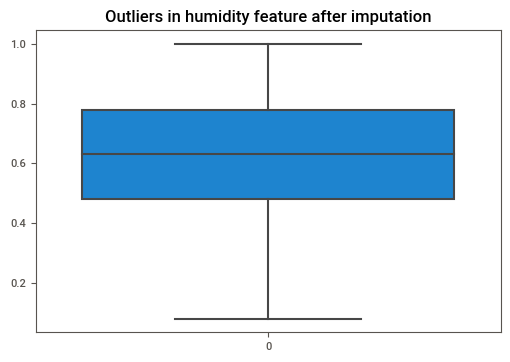

In [66]:
sns.boxplot(data=preprocessed_data.humidity)
plt.title("Outliers in humidity feature after imputation")
plt.show()

* SO, no outliers indicating in humidity feature now .

### Correlation matrix

* correlation matrix is tells us about linear relationship between atributes and help us to build better models.

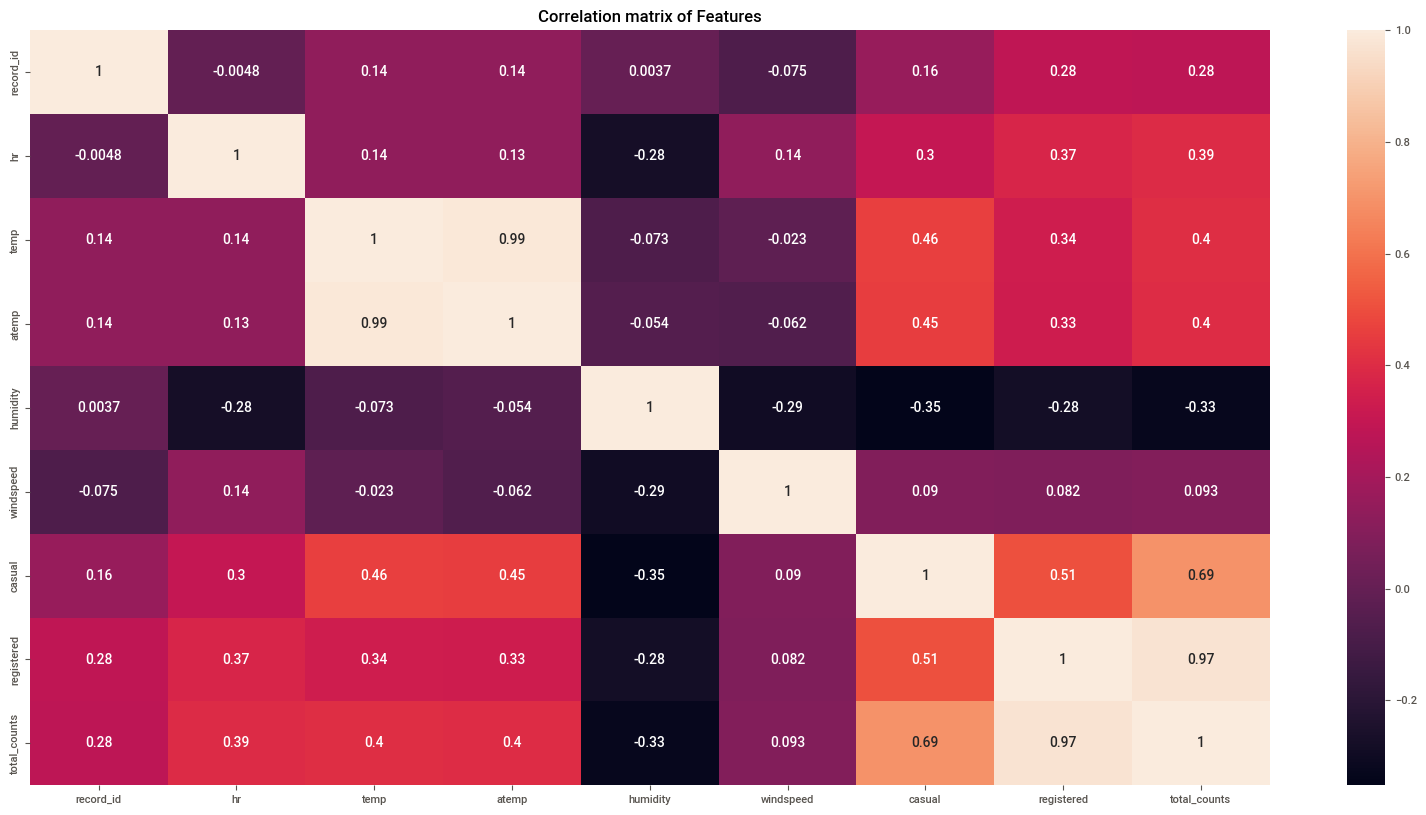

In [67]:
plt.figure(figsize=(20,10))
corr_mtx = preprocessed_data.corr()
sns.heatmap(corr_mtx,annot=True)
plt.title("Correlation matrix of Features")
plt.show()

* From correlation matrix, we can observe that some features are positively coorelated or some are negatively coorelated.
* "temp" and "atemp" are highly correlated to each other, it means both are carrying similar information.
* The total_counts and registered are highly positively correlated to each other. So no need to add registered and atemp features for further analysis.

### Model Building

### Linear Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Defining independent and dependent variables

In [69]:
X = preprocessed_data.drop(["registered","atemp","total_counts","date"],axis=1)
Y = preprocessed_data.total_counts.values

In [70]:
preprocessed_data.total_counts.values

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

### Train-test spiltting

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(2)
x_train = poly_feats.fit_transform(x_train)
x_test = poly_feats.fit_transform(x_test)

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

#### Checking the constants and coefficients of equation made by the linear regression for this data

In [74]:
print(lin_reg.intercept_) # constants
print(lin_reg.coef_)   # m(slopes) values

-85.80247988623887
[-9.48291054e-05  3.73948490e-02 -7.28140047e-01  6.49237551e+02
 -2.61261173e+01  1.87858689e+01 -6.26069596e+01  3.65576881e+01
 -5.03252196e+01  1.45138097e+01  1.38739017e+02  1.00319224e+02
  5.81629069e+01  1.34088797e+00  1.91362679e-05  5.49453689e-02
 -3.51859855e-01 -4.95678357e-02 -5.18234982e-04 -4.62729583e-02
 -1.70722342e-03 -1.82544855e-03 -7.46504323e-03  5.21363500e-02
 -2.50302051e-02  3.35700162e-02 -4.31413361e-05 -1.73368130e+00
 -4.66527201e+02 -3.86896271e+01  5.86390157e-01  1.21413868e+01
 -2.10679869e+00  7.95974363e+00  1.13373044e+00  4.77295327e+00
  6.89939363e+00  7.60824920e+00  9.22991214e-02  6.49237584e+02
  4.41697687e+02  5.90741400e+00  3.95696428e+02  1.47401810e+01
  4.59481338e+01  6.18265971e+01 -5.15779962e+02  2.30533033e+02
 -2.79267555e+02  9.04274213e-01  2.53754823e+01  4.39896804e-01
  2.94439945e+01  1.60014553e+00  1.04483062e+00  4.51645402e+00
 -4.05383200e+01  2.04906500e+01 -2.57517536e+01  3.77541234e-02
 -6.68

### Model Evaluation

In [75]:
y_train_pred = lin_reg.predict(x_train)
r2_score(y_train,y_train_pred)

0.6949468371017329

In [76]:
x_train.shape

(13903, 105)

In [77]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.69)*(13903-1)/(13903-105-1)
train_adjusted_r2

0.6876407914764078

* Here, we comed up with the 0.69 r2_score and 0.68 adjusted r2_score for training data

In [78]:
y_test_pred = lin_reg.predict(x_test)
r2_score(y_test,y_test_pred)

0.6869557307335368

In [79]:
x_test.shape

(3476, 105)

In [80]:
## CHecking adjusted r2 score
test_adjusted_r2 = 1-(1-0.68)*(3476-1)/(3476-105-1)
test_adjusted_r2

0.6700296735905045

* Here, we comed up with the 0.68 r2_score and 0.67 adjusted r2_score for testing data

In [81]:
import math
print(math.sqrt(mean_squared_error(y_test,y_test_pred)))

99.56242038461639


In [82]:
mean_absolute_error(y_test,y_test_pred)

68.79986302719999

### Conclusion

* It can be observed that while using linear regression for this data we're getting 68% accuracy score and
* Approx. 99.57 mean_squared error
* Approx. 68.80 mean_absolute_error

#### For better results lets try to train our data with other algorithms too.

### SVM Regressor

In [83]:
from sklearn.svm import SVR

In [84]:
svr = SVR(kernel="rbf")
svr.fit(x_train,y_train)

SVR()

In [85]:
y_hat = svr.predict(x_test)

### Model Evaluation

In [86]:
svr.score(x_train,y_train)

0.06554078735366053

In [87]:
r2_score(y_test,y_hat)

0.062117671257266194

In [88]:
print(math.sqrt(mean_squared_error(y_test,y_hat)))

172.33232350558208


In [89]:
mean_absolute_error(y_test,y_hat)

128.77649488944013

### Conclusion:
* We can observe that while using SVmregressor for this data we're getting very less percentage of accuracy score i.e. 0.062
*128.77 mean_absolute_error which is greater than the linear regression model's
#### So, next step is to go with hyper tuning

### SVM Hyper Parametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001] 
             } 
model=SVR()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='neg_mean_squared_error',cv=5)
  
# fitting the model for grid search
grid.fit(X,Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...................................C=1, gamma=0.001; total time=  37.8s
[CV] END ...................................C=1, gamma=0.001; total time=  37.0s
[CV] END ...................................C=1, gamma=0.001; total time=  36.7s
[CV] END ...................................C=1, gamma=0.001; total time=  37.5s
[CV] END ...................................C=1, gamma=0.001; total time=  36.8s
[CV] END ..................................C=1, gamma=0.0001; total time=  36.1s
[CV] END ..................................C=1, gamma=0.0001; total time=  36.0s
[CV] END ..................................C=1, gamma=0.0001; total time=  36.0s
[CV] END ..................................C=1, gamma=0.0001; total time=  36.4s
[CV] END ..................................C=1, gamma=0.0001; total time=  42.5s
[CV] END ..................................C=10, gamma=0.001; total time=  58.9s
[CV] END ..................................C=10, 

In [ ]:
print(grid.best_params_)

In [ ]:
svm_reg = SVR(C=1000, gamma = 0.001)

### First we did with best params but it was giving us the accuracy in negative value so we go with the above parameter value

In [ ]:
svm_reg.fit(x_train,y_train)

In [ ]:
y_hat2 = svm_reg.predict(x_test)

In [ ]:
svm_reg.score(x_train,y_train)

In [ ]:
r2_score(y_test,y_hat2)

### Conclusion:
* With SVM, we comed with the model performance of 99% But,
* On testing side it is performing very bad as we can observed r2_score in negative.
* We decide not to go with further tuning and proceed with KNN regressor.

### Knn Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

### Selection of optimal k

In [ ]:
rmse_value = []

for k in range(1,20):
    knn_regressor_model = KNeighborsRegressor(n_neighbors = k)
    knn_regressor_model.fit(x_train,y_train)
    y_pred= knn_regressor_model.predict(x_test)
    
    error= np.sqrt(mean_squared_error(y_test,y_pred))
    
    rmse_value.append(error)
    print('Root mean squared error for k=',k,'is:=',error)

In [ ]:
plt.plot(range(1,20),rmse_value)
plt.xlabel("Range")
plt.ylabel("Errors")
plt.show()

* We selected k=2 as it is giving less error

In [ ]:
Knn_regressor_actual_model = KNeighborsRegressor(n_neighbors=2)

In [ ]:
Knn_regressor_actual_model.fit(x_train,y_train)

In [ ]:
y_knn_hat = Knn_regressor_actual_model.predict(x_test)

### Evaluation of Regressor model

In [ ]:
r2_score(y_test,y_knn_hat)

In [ ]:
x_test.shape

In [ ]:
adjustedr2 = 1-(1-0.66)*(3476-1)/(3476-105-1)

In [ ]:
adjustedr2

In [ ]:
mean_absolute_error(y_test,y_knn_hat)

In [ ]:
math.sqrt(mean_squared_error(y_test,y_knn_hat))

### Conclusion
* So here we're getting 66 accuracy score and 64% adjusted_r2_score which is better than svm.
* 61.761 mean_absolute_error
* Errors are also less than the errors that we got in SVM model.
####  To increase model performance more lets train our data with decision tree now.
## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_hat_dt=dt.predict(x_test)

### Evaluation of decision tree

In [ ]:
math.sqrt(mean_squared_error(y_test,y_hat_dt))

In [ ]:
mean_absolute_error(y_test,y_hat_dt)

In [ ]:
r2_score(y_test,y_hat_dt)

In [ ]:
adjustedr2 = adjustedr2 = 1-(1-0.92)*(3476-1)/(3476-105-1)
adjustedr2

### Conclusion:
* Here we are getting far better results as we're getting 92% accuracy_score.
* And very less errors as compared with the above model's errors.
#### To increase accuracy more than this lets do hyperparameter tuning.
### Hyperparameter Tuning - Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,10,12,15,16,18,20],
           
            "min_samples_split":[2, 3, 4],
            "min_samples_leaf":[2,3,4,6,10], 
}

In [ ]:
tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
tuning_model.fit(X,Y)

In [ ]:
 tuning_model.best_params_

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=18,min_samples_leaf=6,min_samples_split=4,splitter='best')

In [ ]:
tuned_hyper_model.fit(x_train,y_train)

### Evaluating the model performance

In [ ]:
tuned_pred=tuned_hyper_model.predict(x_test)

In [ ]:
r2_score(y_test,tuned_pred)

In [ ]:
adjustedr2 = adjustedr2 = 1-(1-0.94)*(3476-1)/(3476-105-1)
adjustedr2

In [ ]:
tuned_hyper_model.score(x_train,y_train)

In [ ]:
mean_absolute_error(y_test,tuned_pred)

### Conclusion:
* And here the purpose for which this model was used was fulfilled.
* On Comparing the errors and accuracy score with simple decision tree model this tuned modelis working better.
* Now lets take a walk through the ensemble techniques to increase accuracy_score more than this.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=800)
rf_reg.fit(x_train,y_train)

In [ ]:
y_predict_rf=rf_reg.predict(x_test)

### Evaluation

In [ ]:
import math
print("Mean Squared Error :",math.sqrt(mean_squared_error(y_test,y_predict_rf)))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_predict_rf))

In [ ]:
rf_reg.score(x_train,y_train)

In [ ]:
r2_score(y_test,y_predict_rf)

### Conclusion:
* So random forest model score is 99% and r2_score is 96% which is not bad.
* with random forest we got 1% increase in performance.

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
 max_features = ['auto', 'sqrt']   
max_depth = [int(x) for x in np.linspace(10, 99, num=11)]
 max_depth.append(None)
min_samples_split = [2, 5, 10]
 min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
                'max_depth': max_depth, 'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}
 rf_regr = RandomForestRegressor(random_state=42)

rf_regr= RandomizedSearchCV(estimator=rf_regr, scoring="neg_mean_squared_error",param_distributions=random_grid, n_iter=50, cv=3, 
                                verbose=3, random_state=42, n_jobs=-1)

 rf_regr.fit(x_train, y_train)  

#### We tried alot with hyper paarameter tuning but we're unable to do that because of our system.
### Croos_Validation_Prediction

In [ ]:
# cross validation prediction
from sklearn.model_selection import cross_val_score,cross_val_predict
predict = cross_val_predict(rf_reg,x_train,y_train,cv=3)
predict

In [ ]:
r2_score = cross_val_score(rf_reg,x_train,y_train,cv=3)

In [ ]:
print("R-Squared scores :",np.average(r2_score))

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print("Root mean squared error :",rmse)
mae= mean_absolute_error(y_test,y_predict)
print("Mean absolute error :",mae)

#### Conclusion:
* WE received 96% r2_score using cross_validation
* AND got an increase of 2% in testing accuracy using cross-validation

### Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
rf_reg_bagg = RandomForestRegressor() 
model_bagg1=BaggingRegressor(base_estimator=rf_reg_bagg,n_estimators=52) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test)

In [ ]:
model_bagg1.score(x_train,y_train)

In [ ]:
r2_score(y_test,y_hat_bagg)

In [ ]:
print("Mean Squared Error :",math.sqrt(mean_squared_error(y_test,y_hat_bagg)))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_hat_bagg))

### Conclusion:
* With bagging no change shown in model performance.
* Now let us use boosting ensemble technique.

### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation

In [ ]:
gbm.fit(x_train,y_train) ## fitting the data

In [ ]:
y_gbm=gbm.predict(x_test)

In [ ]:
gbm.score(x_train,y_train)

In [ ]:
r2_score(y_test,y_gbm)

In [ ]:
print("Mean Squared Error :",math.sqrt(mean_squared_error(y_test,y_gbm)))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gbm))

### Conclusion:
* By using Boosting we're getting approx. 95% model performance.
* But the problem here is that we're getting increase in errors.
### The actual values and the predicted values

In [ ]:
data1 = pd.DataFrame(y_test,columns=["y_test"])
data2 = pd.DataFrame(y_predict_rf,columns=["y_predict_rf"])
future_predictions = pd.merge(data1,data2,left_index = True,right_index=True )
future_predictions.to_csv("Bike_Rental_predictions.csv")
future_predictions